# Analyse EDA multivariée de cosmetics_data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Premier aperçu

In [2]:
data = pd.read_csv('./Data/cosmetics_cleaned.csv')

In [3]:
data.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,...,"('yellow ', 13)","('zea mays oil', 7)","('zea mays starch', 15)","('zinc gluconate', 76)","('zinc oxide', 21)","('zinc oxide %water', 9)","('zinc pca', 19)","('zinc sulfate', 16)","('zingiber aromaticus extract', 7)","('zingiber officinale root extract', 40)"
0,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive,Harmful_Substances,"('acacia senegal gum', 9)","('acer saccharum extract', 27)",...,"('yellow ', 13)","('zea mays oil', 7)","('zea mays starch', 15)","('zinc gluconate', 76)","('zinc oxide', 21)","('zinc oxide %water', 9)","('zinc pca', 19)","('zinc sulfate', 16)","('zingiber aromaticus extract', 7)","('zingiber officinale root extract', 40)"
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,56.013371,4.150387,0.669247,0.626319,0.665025,0.619282,0.522167,3.751583,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
std,45.036314,0.629538,0.470650,0.483951,0.472148,0.485734,0.499684,3.416747,0.031623,0.031623,...,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,4.300000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Description :

- La moyenne des prix est de $56 pour un produit cosmétique
- L'évaluation est en moyenne de 4,15 sur 5
- Il y a moins de produits adaptés aux peaux sensibles par rapport aux autres types de peaux

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Columns: 1012 entries, Label to ('zingiber officinale root extract', 40)
dtypes: float64(1007), object(5)
memory usage: 11.1+ MB


## Pairplot creation

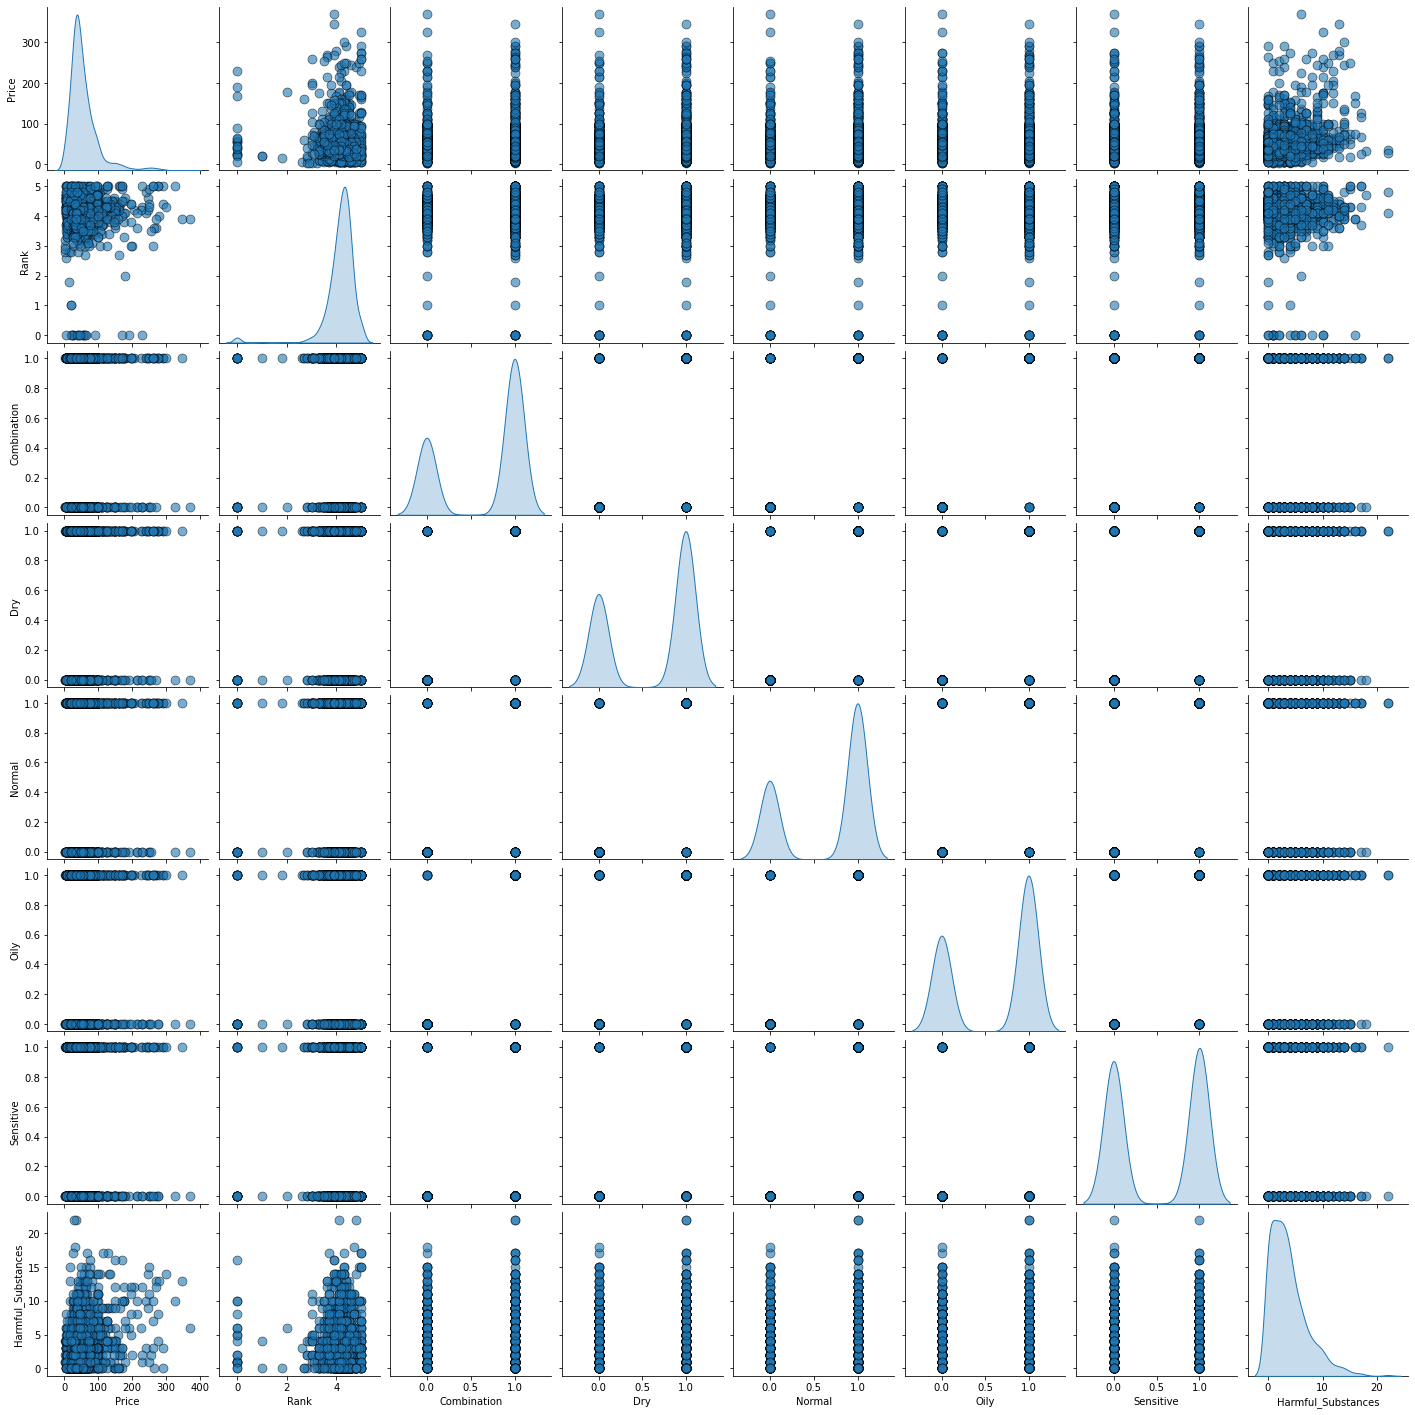

In [6]:
sns.pairplot(data.iloc[:,1:12], diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

Hétéroscédasticité entre les prix et les substances nocives dans les produits cosmétiques, variance différente

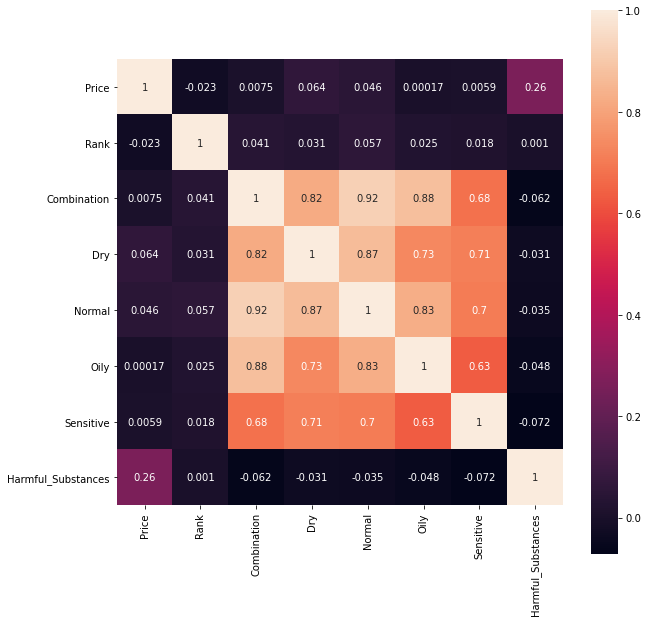

In [7]:
#Voir l'ensemble des taux de corrélation

plt.figure(figsize=(10, 10))
p = sns.heatmap(data.iloc[:,1:12].corr(), annot=True, square=True)

- Forte corrélation entre produits à destination des peaux sèches et peaux mixtes
- Forte corrélation entre produits à destination des peaux normales et peaux mixtes
- Forte corrélation entre produits à destination des peaux grasses et peaux mixtes
entre normal et 

Des produits sont adapts à tous les types de peaux
Corrélation entre produits peaux sèches et peaux grasses ????

In [8]:
data.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,...,"('yellow ', 13)","('zea mays oil', 7)","('zea mays starch', 15)","('zinc gluconate', 76)","('zinc oxide', 21)","('zinc oxide %water', 9)","('zinc pca', 19)","('zinc sulfate', 16)","('zingiber aromaticus extract', 7)","('zingiber officinale root extract', 40)"
0,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_brand = data.groupby(['Brand'])['Label'].count()

In [14]:
df_brand

Brand
ALGENIST               27
AMOREPACIFIC           21
ANTHONY                 3
APIVITA                 1
BAREMINERALS            5
                       ..
URBAN DECAY             1
VITA LIBERATA           2
VOLITION BEAUTY         5
WANDER BEAUTY           2
YOUTH TO THE PEOPLE     7
Name: Label, Length: 114, dtype: int64

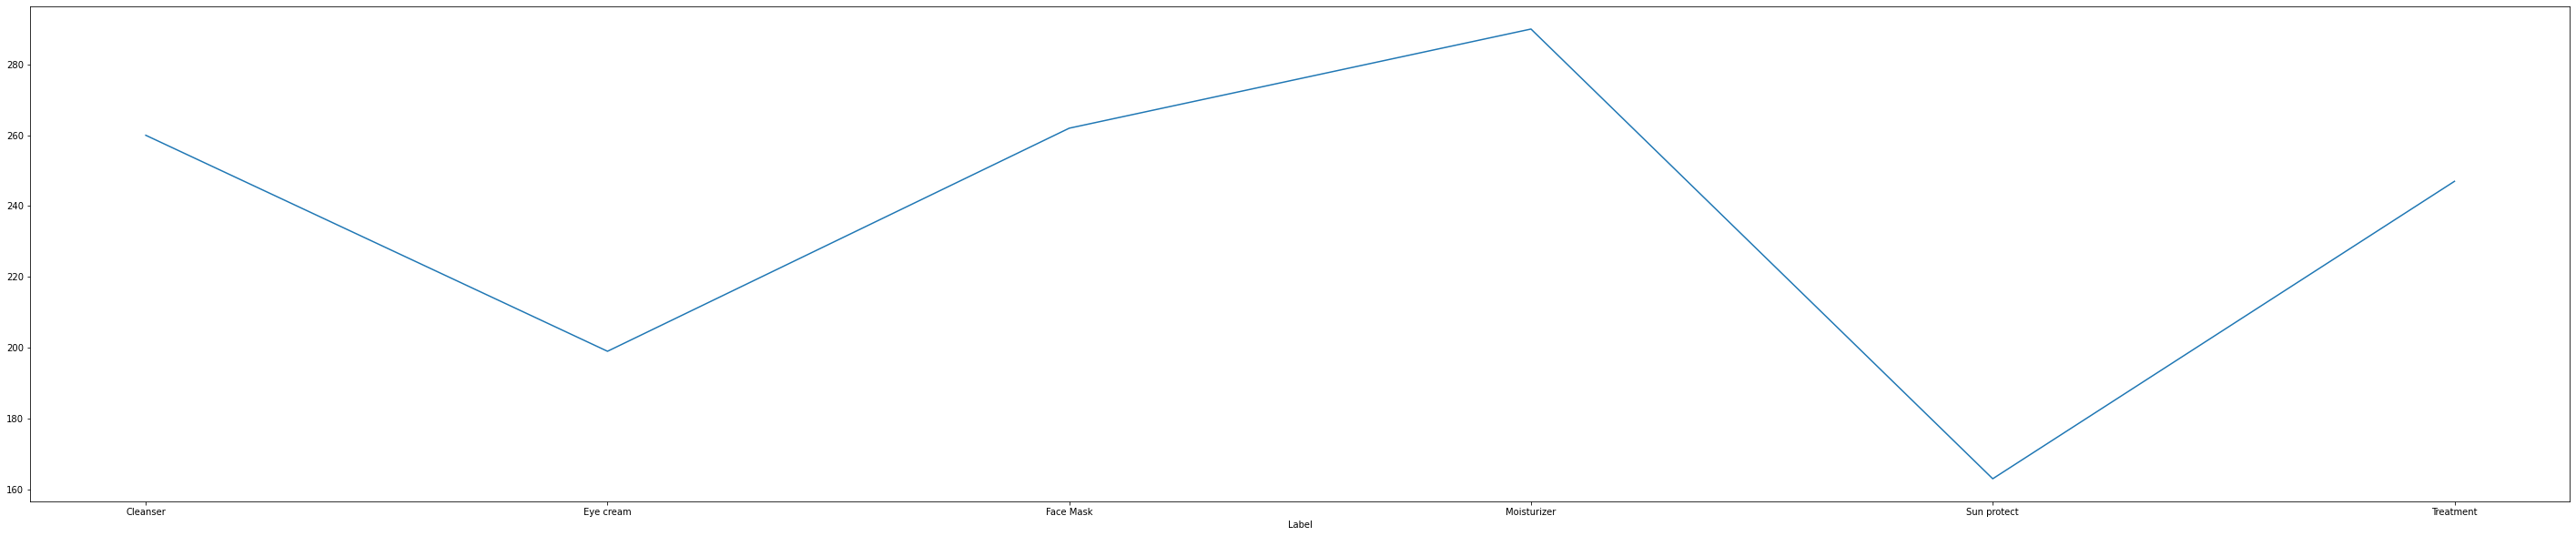

In [15]:
#Prix moyen par catégorie "Label" de produits cosmétiques :

plt.figure(figsize=(50, 10))
graph = data.groupby(['Label'])['Price'].count().plot()

- Le prix moyen le plus bas concerne les crèmes solaires
- Le prix moyen le plus haut concerne les crèmes

En moyenne 4 substances nocives pour un produit crème alors que 3 en moyenne pour les nettoyants

In [18]:
" par marque"

' par marque'

In [19]:
ax = sns.displot(x=df_cnam[df_cnam["année"] == 2014].groupby(["enseignant_code"])["code"].count())

NameError: name 'df_cnam' is not defined

## Création d'une colonne pour connaître la proportion d'ingrédients nocifs par produit

In [20]:
data["Harmful_part"] = data.Harmful_Substances / data.Ingredients.str.len() * 100

In [21]:
data.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,...,"('zea mays oil', 7)","('zea mays starch', 15)","('zinc gluconate', 76)","('zinc oxide', 21)","('zinc oxide %water', 9)","('zinc pca', 19)","('zinc sulfate', 16)","('zingiber aromaticus extract', 7)","('zingiber officinale root extract', 40)",Harmful_part
0,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.231527
1,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.793651
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093633
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.754717
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240732


In [ ]:
#marques qui en moyenne ont une proportion importante

In [39]:
data.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive,Harmful_Substances,"('acacia senegal gum', 9)","('acer saccharum extract', 27)",...,"('zea mays oil', 7)","('zea mays starch', 15)","('zinc gluconate', 76)","('zinc oxide', 21)","('zinc oxide %water', 9)","('zinc pca', 19)","('zinc sulfate', 16)","('zingiber aromaticus extract', 7)","('zingiber officinale root extract', 40)",Harmful_part
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1421.000000
mean,56.013371,4.150387,0.669247,0.626319,0.665025,0.619282,0.522167,3.751583,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.505721
std,45.036314,0.629538,0.470650,0.483951,0.472148,0.485734,0.499684,3.416747,0.031623,0.031623,...,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.450177
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176056
50%,44.000000,4.300000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.406504
75%,68.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.723888
max,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.884615


En moyenne, il y a 0,5 % d'ingrédients nocifs sur l'ensemble des produits cosmétiques
Au vu de la médiane plus faible, il semble que certains produits soient plus composés d'ingrédients nocifs
Le maximum de proportion de toxicité du produit monte à 2,88 %
Il y a des produits qui contiennent 0 ingrédient nocif

## Analysons les produits sans aucun ingrédient nocif :

In [58]:
#Les produits sans aucun ingrédient nocif :
data_safe = data.query('Harmful_part == 0')

In [59]:
# 15% des produits cosmétiques sont sans ingrédient nocif
len(data_safe) / len(data) * 100

15.650969529085874

<AxesSubplot:>

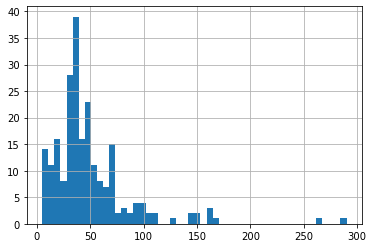

In [60]:
data_safe['Price'].hist(bins=50)

In [61]:
data_others = data.query('Harmful_part > 0')

<AxesSubplot:>

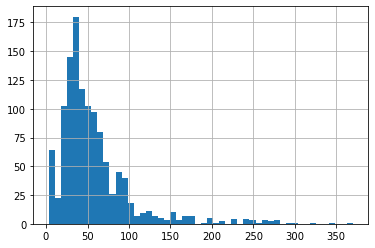

In [62]:
data_others['Price'].hist(bins=50)

Le prix ne semble pas être influencé par la proportion des ingrédients sains car les 2 distributions se ressemblent.

## Nombre de produits par marque

In [69]:
data.columns

Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination',
       'Dry', 'Normal', 'Oily',
       ...
       '('zea mays oil', 7)', '('zea mays starch', 15)',
       '('zinc gluconate', 76)', '('zinc oxide', 21)',
       '('zinc oxide %water', 9)', '('zinc pca', 19)', '('zinc sulfate', 16)',
       '('zingiber aromaticus extract', 7)',
       '('zingiber officinale root extract', 40)', 'Harmful_part'],
      dtype='object', length=1013)

In [76]:
data_brand_safe = data_safe.groupby(["Brand"])["Name"].count().sort_values(ascending=False)

In [82]:
len(data_safe.Brand.value_counts())

73

In [80]:
data_brand_safe.head()

Brand
CLINIQUE     16
COOLA        14
BOSCIA       12
HERBIVORE    11
CAUDALIE     10
Name: Name, dtype: int64

<AxesSubplot:>

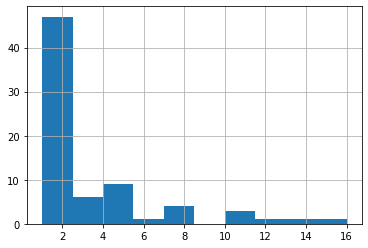

In [79]:
data_brand_safe.hist()

Plus de 45 marques sur les 73 marques proposent entre 1 et 2 produits totalement sains sur leur gamme.

In [83]:
data_brand_others = data_others.groupby(["Brand"])["Name"].count().sort_values(ascending=False)

In [66]:
data_brand_others = data_others.groupby(["Brand"])["Harmful_part"].count()

In [87]:
data_brand_others.head()

Brand
CLINIQUE              62
SHISEIDO              52
ORIGINS               50
MURAD                 46
SEPHORA COLLECTION    45
Name: Name, dtype: int64

In [84]:
len(data_others.Brand.value_counts())

103

<AxesSubplot:>

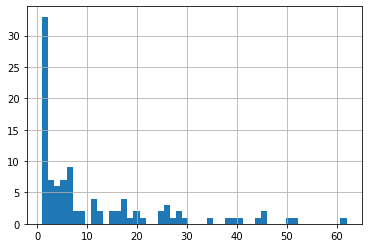

In [86]:
data_brand_others.hist(bins=50)

Pour les produits cosmétiques autres (avec ingrédients nocifs), les marques proposent en général plus de 30 produits

## Taux de toxicité par marque

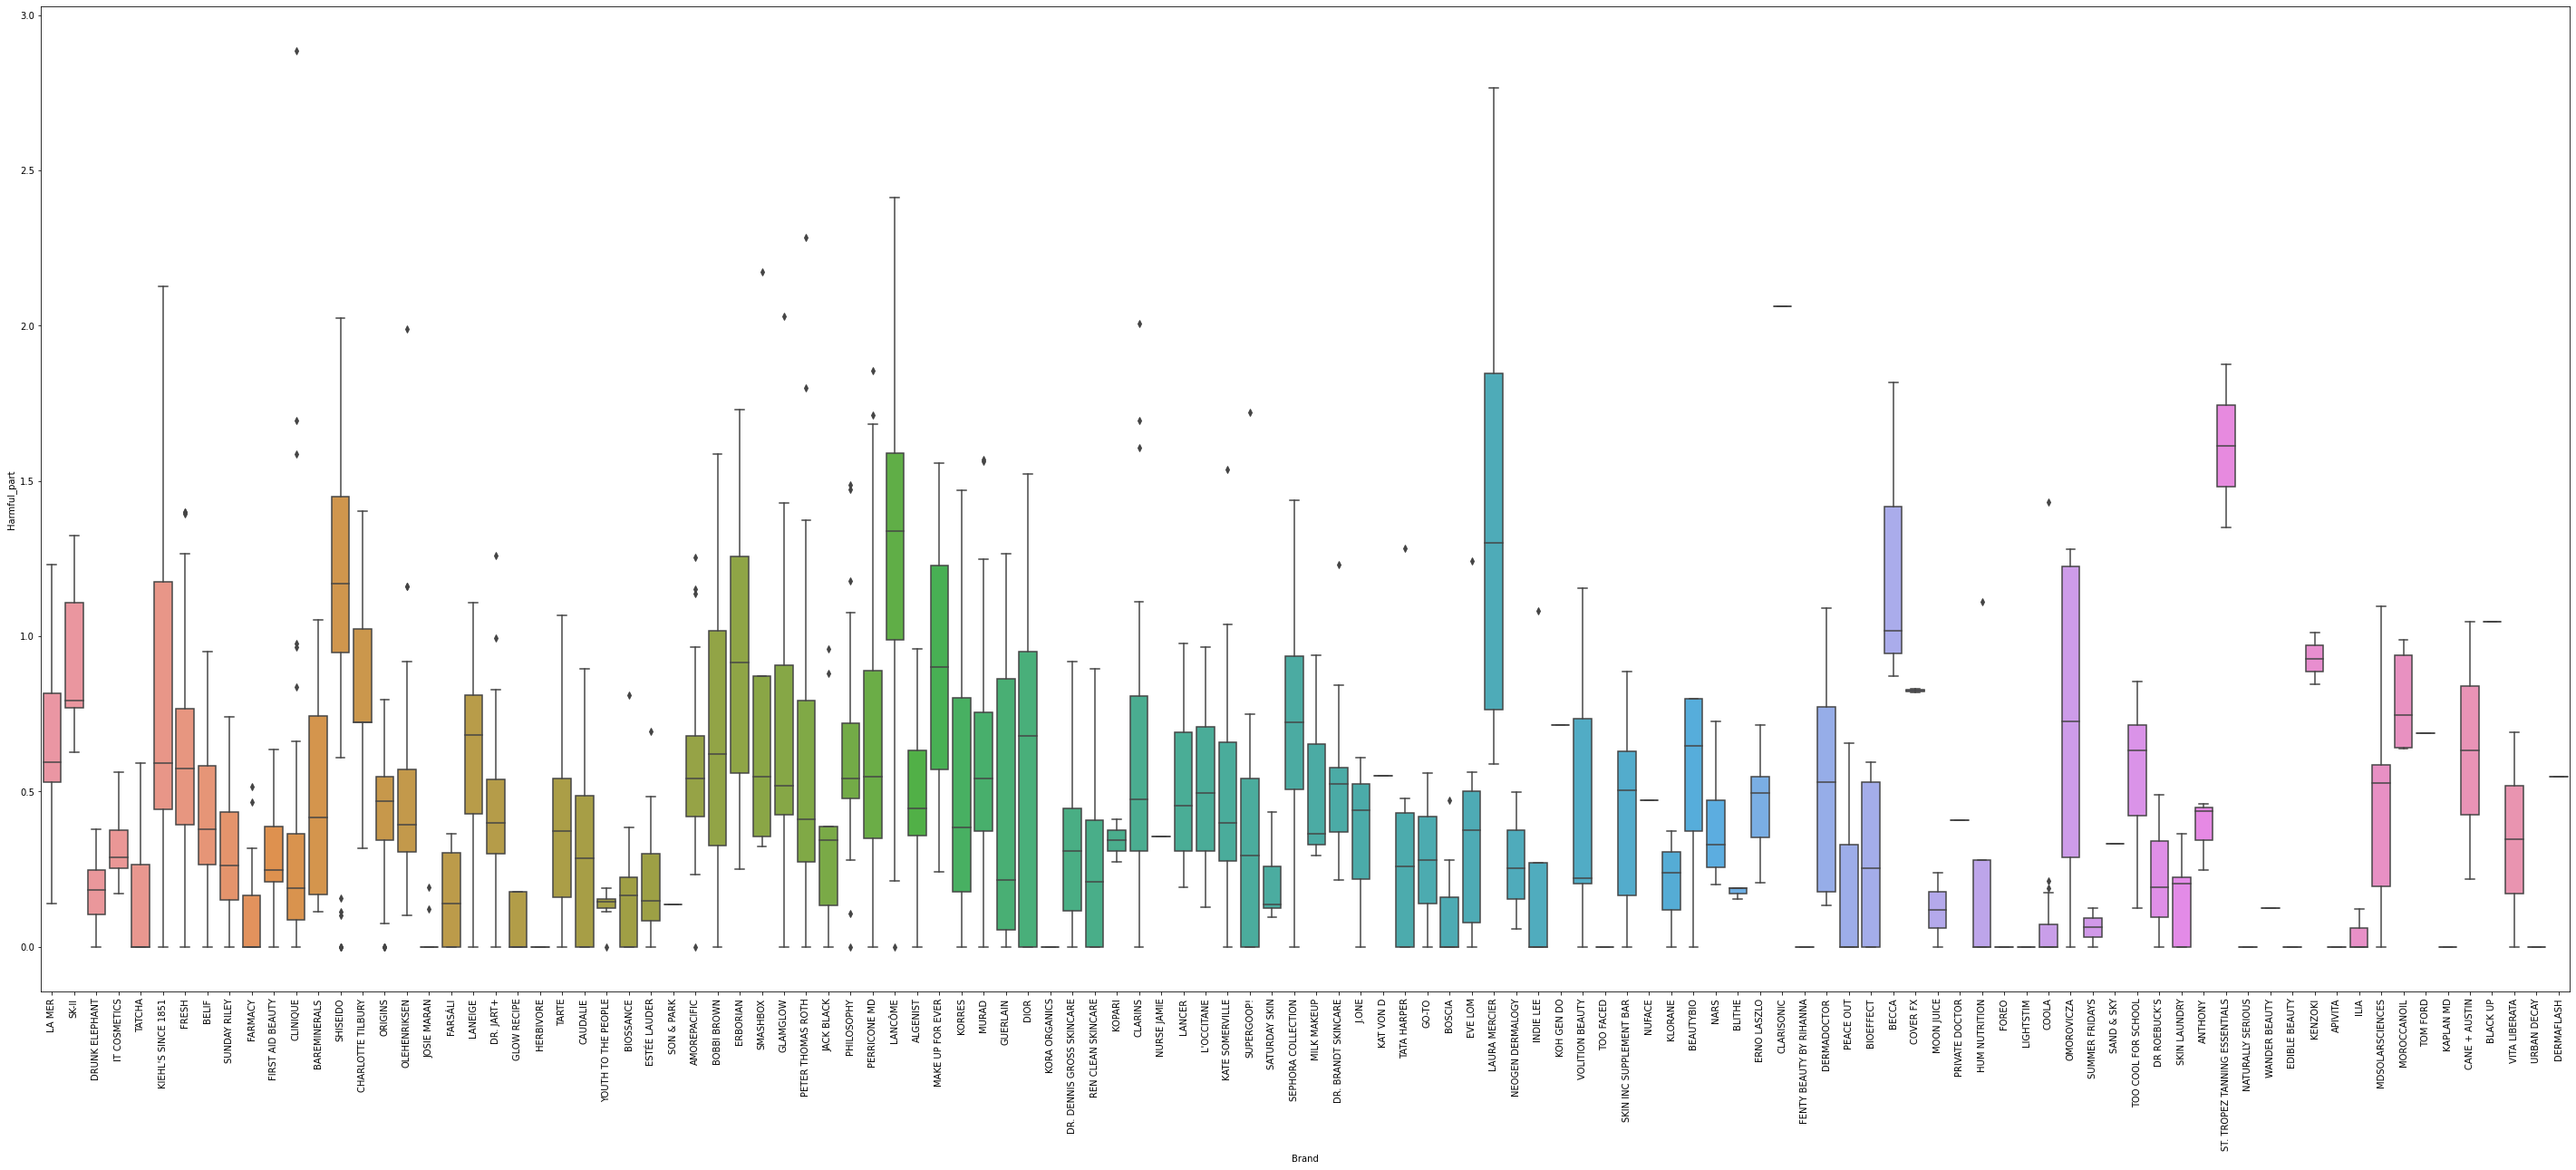

In [97]:
plt.figure(figsize=(50, 20))
ax = sns.boxplot(x="Brand", y="Harmful_part", data=data)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

En termes de nombre d'ingrédients par produits, il semble que certaines marques sont à éviter / privilégier.

Marques à éviter : Shiseido ; Lancôme, Laura Mercier, Becca, Naturally Serious

> Il faut cependant voir les ingrédients nocifs non pas en termes de quantité, mais de forte toxicité. Quels ingrédients à éviter ?

## Prix par marque

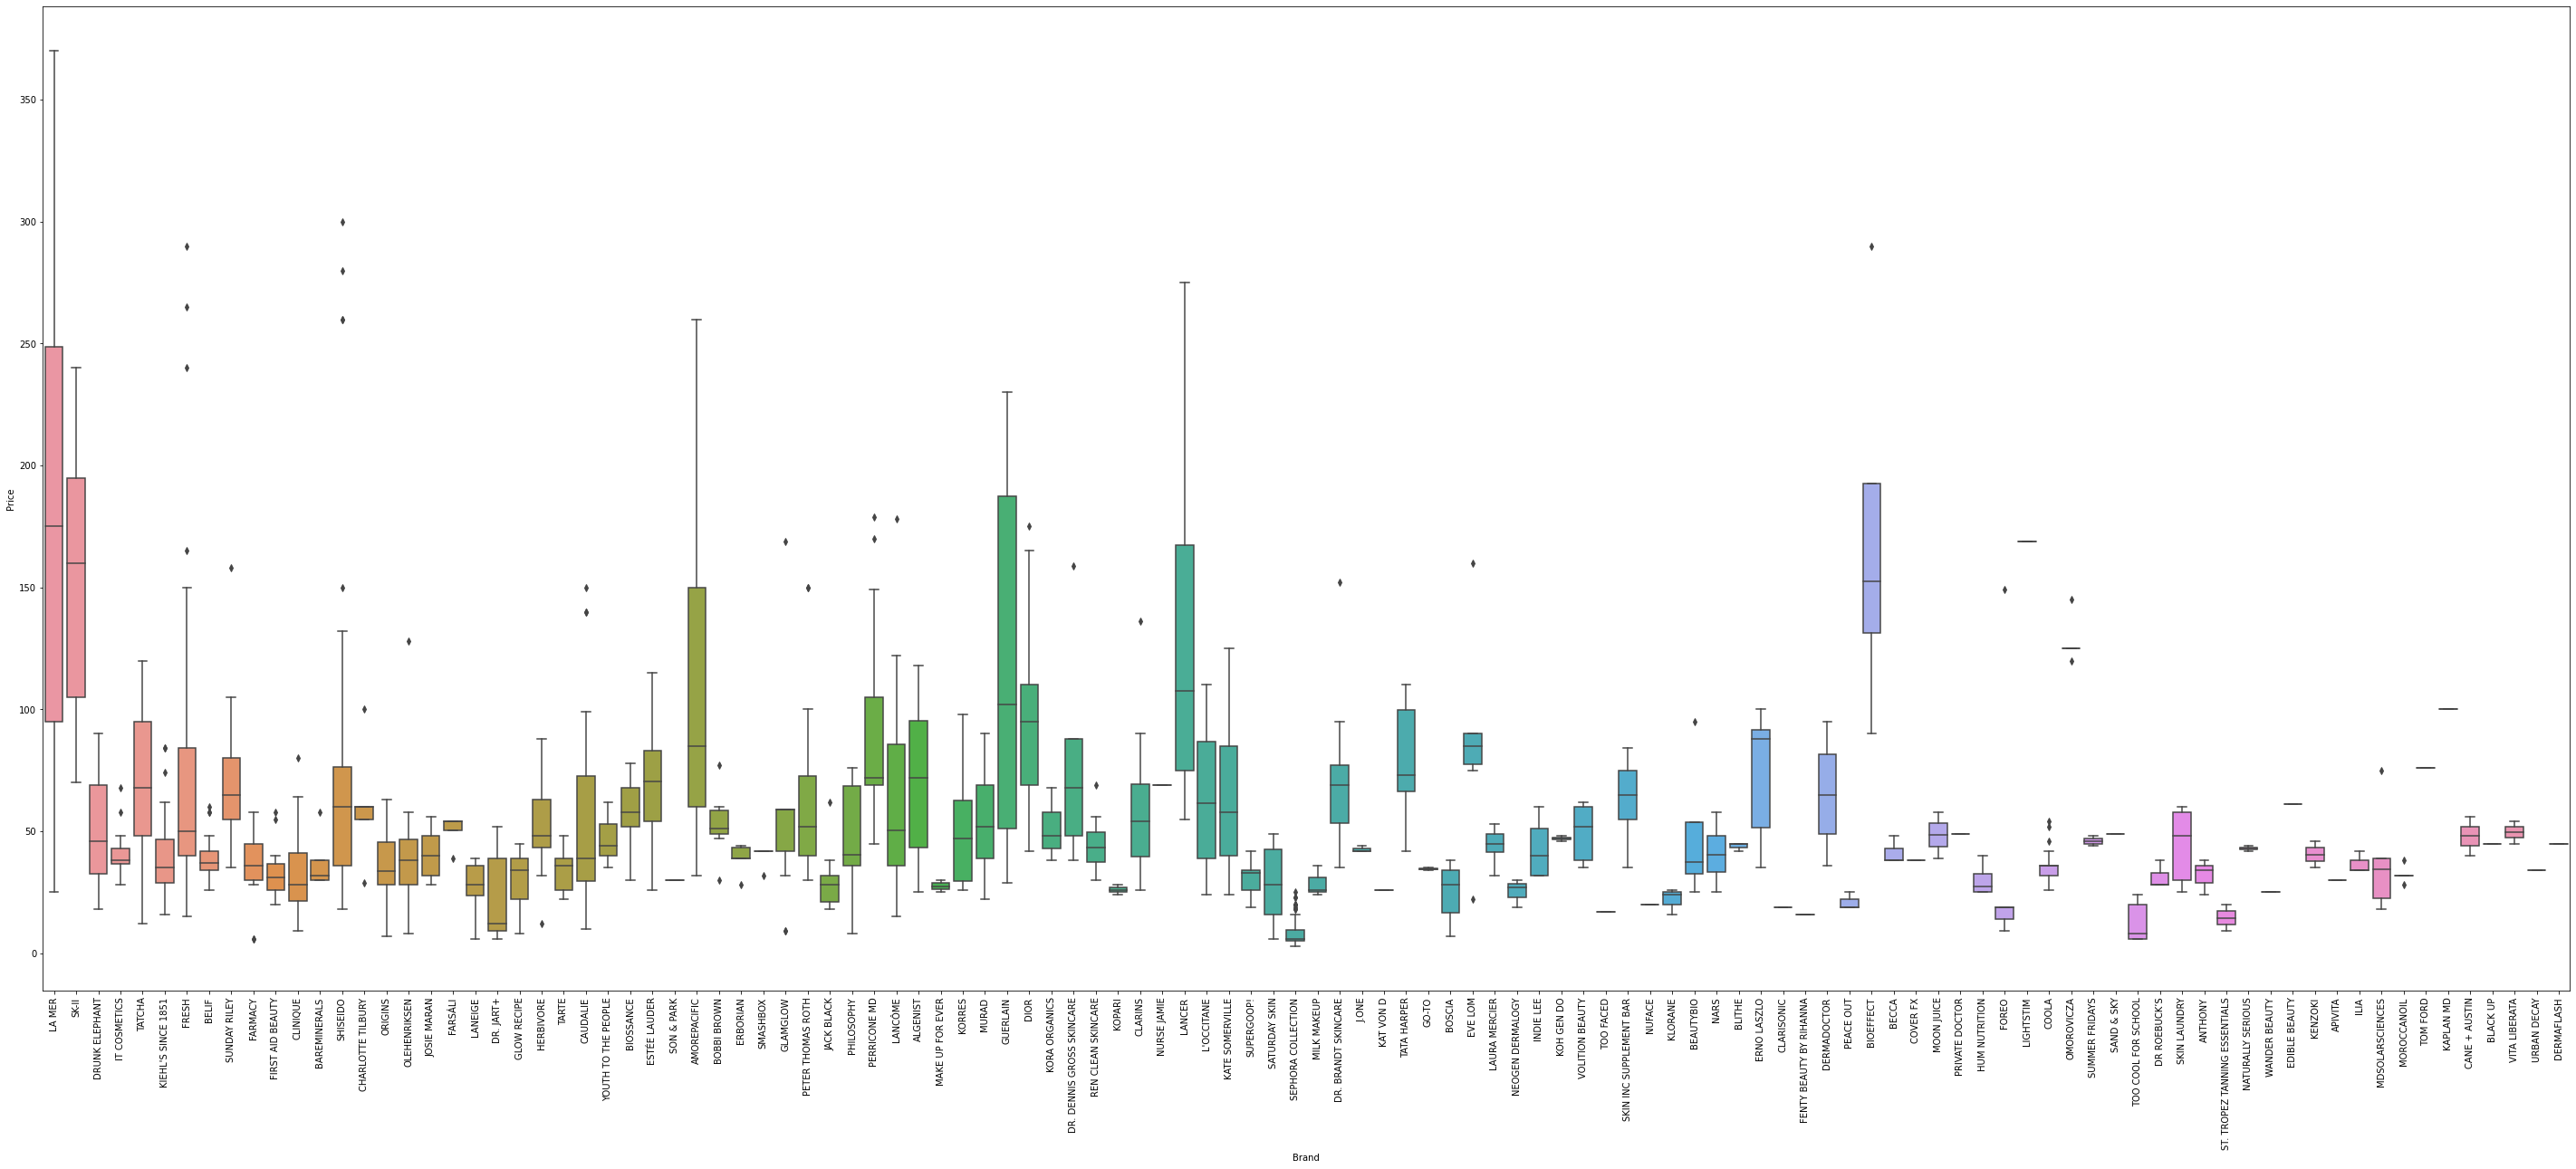

In [96]:
plt.figure(figsize=(50, 20))
ax = sns.boxplot(x="Brand", y="Price", data=data)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

En termes de prix des produits par marque, les prix des produits La Mer & Guerlain sont très variables et peuvent être les plus coûteux.
Il y a quelques outliers de prix très coûteux chez certaines marques

## Taux de toxicité par type de produit

In [16]:
data.Label.value_counts()

Moisturizer    290
Face Mask      262
Cleanser       260
Treatment      247
Eye cream      199
Sun protect    163
Name: Label, dtype: int64

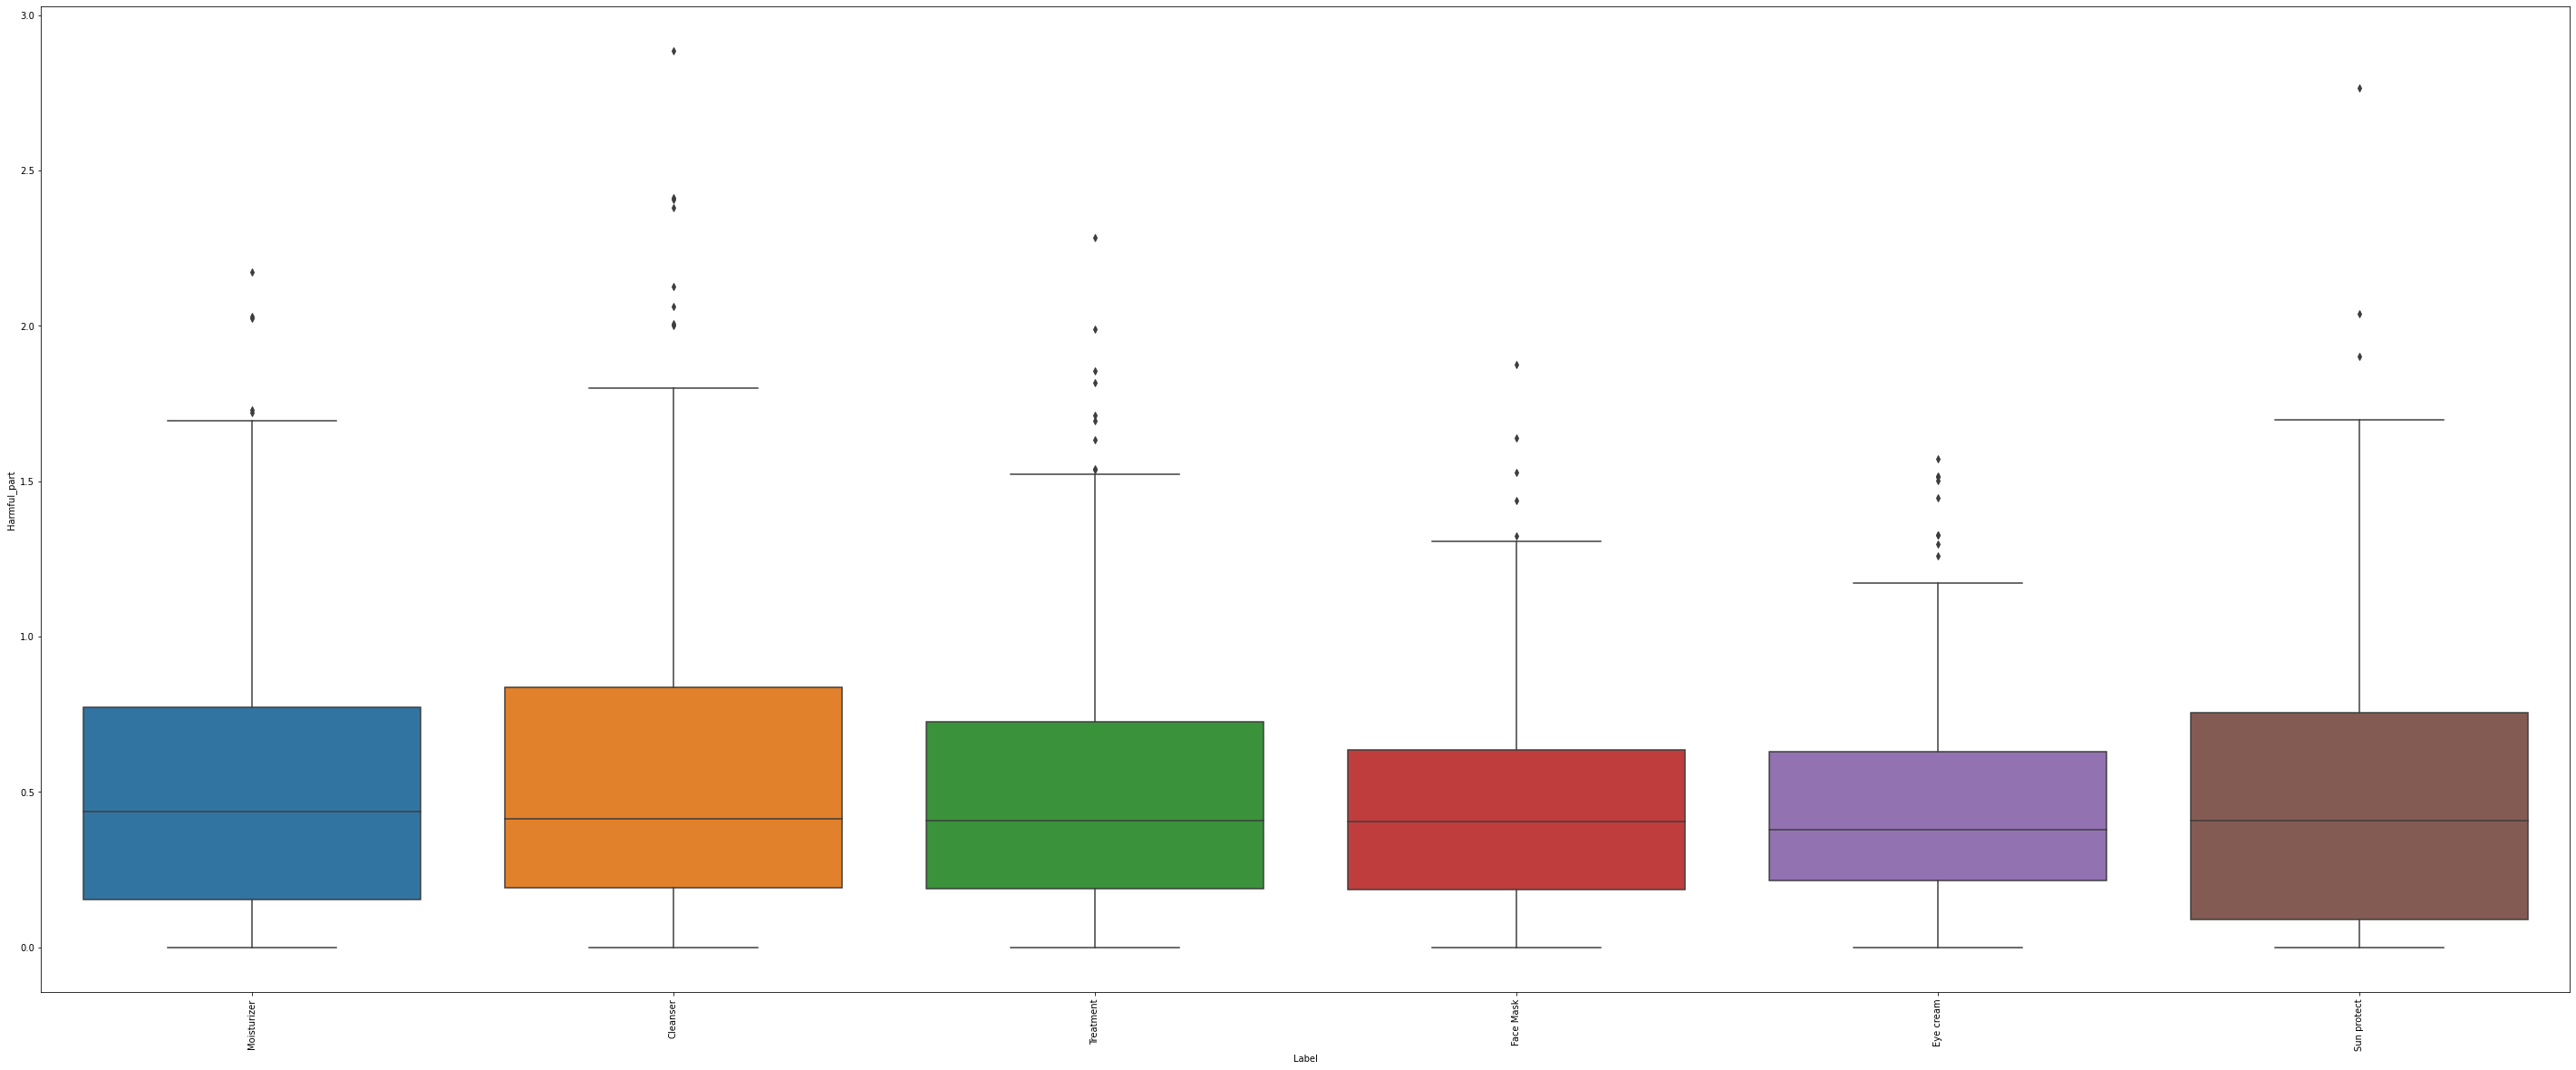

In [98]:
plt.figure(figsize=(50, 20))
ax = sns.boxplot(x="Label", y="Harmful_part", data=data)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Le nombre d'ingrédients nocifs par produits ne dépend visiblement peu du type de produits. Cependant, il semble que les produits nettoyants soient plus concentrés en nombre d'ingrédients nocifs au vu des outliers.

## Prix par type de produit

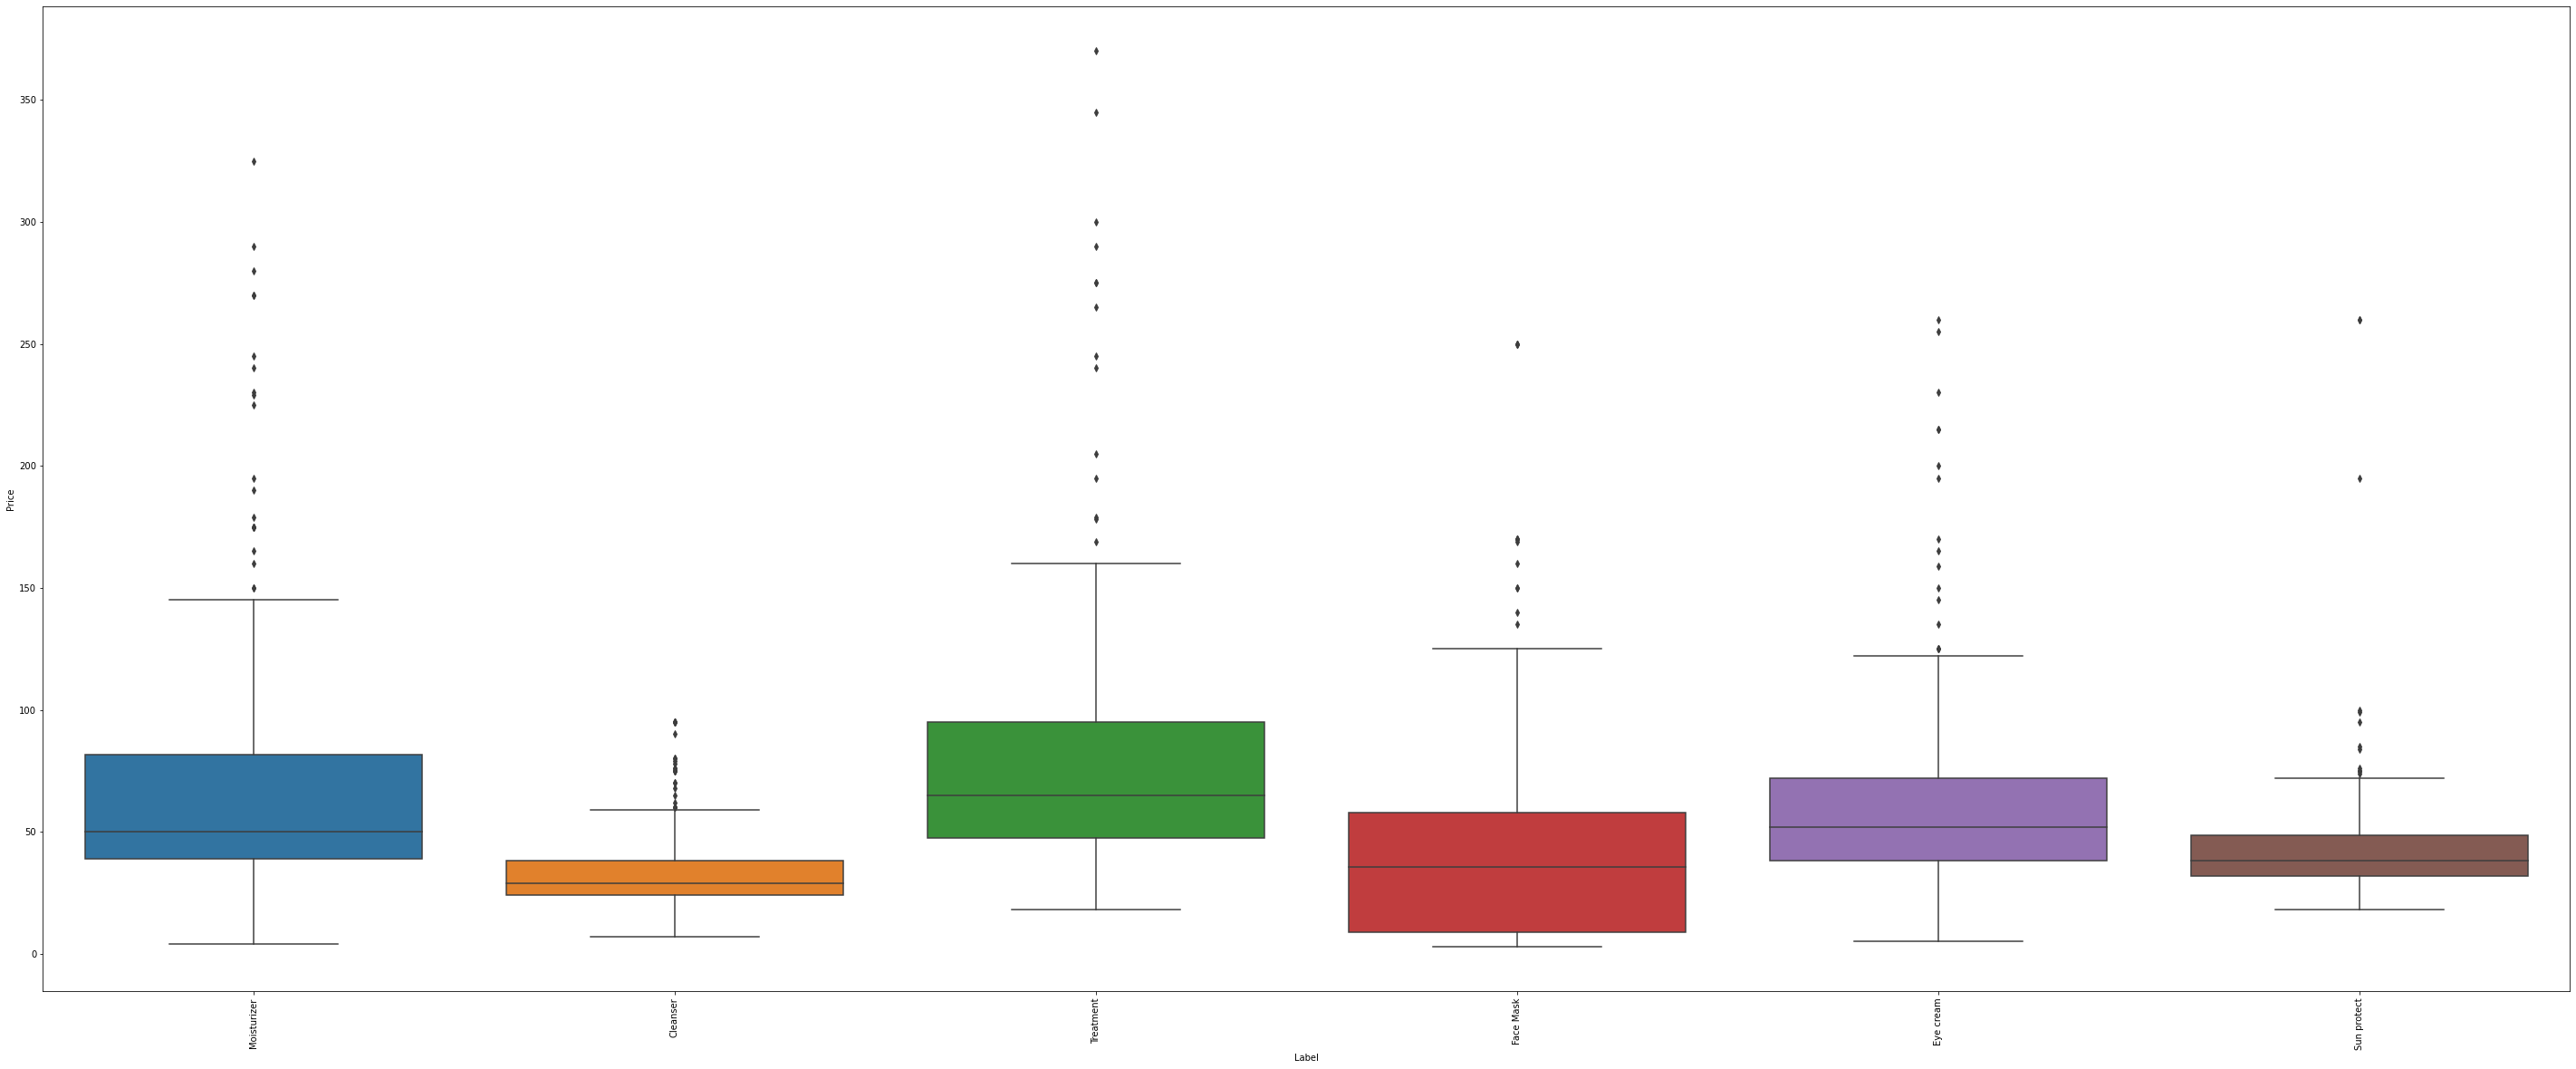

In [99]:
plt.figure(figsize=(50, 20))
ax = sns.boxplot(x="Label", y="Price", data=data)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Les prix semblent être bien impactés par le type de produit cosmétique. Nous remarquons que les traitements et les crèmes sont en général plus coûteux que les autres types.

In [33]:
data_brand = data.groupby(["Brand"])["Harmful_part"].mean()

In [34]:
data_brand.describe()

count    114.000000
mean       0.449717
std        0.354487
min        0.000000
25%        0.203128
50%        0.401768
75%        0.605471
max        2.061856
Name: Harmful_part, dtype: float64

Il y a en moyenne 0,5 % d'ingrédients nocifs sur l'ensemble des produits cosmétiques


In [101]:
data.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,...,"('zea mays oil', 7)","('zea mays starch', 15)","('zinc gluconate', 76)","('zinc oxide', 21)","('zinc oxide %water', 9)","('zinc pca', 19)","('zinc sulfate', 16)","('zingiber aromaticus extract', 7)","('zingiber officinale root extract', 40)",Harmful_part
0,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.231527
1,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.793651
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093633
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.754717
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240732


In [102]:
pd.crosstab(index=data.Brand, columns="Labels")

col_0,Labels
Brand,
ALGENIST,27
AMOREPACIFIC,21
ANTHONY,3
APIVITA,1
BAREMINERALS,5
...,...
URBAN DECAY,1
VITA LIBERATA,2
VOLITION BEAUTY,5


In [108]:
data_typedepeau = data.groupby(["Brand"])['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive'].sum()

<ipython-input-108-de683c24002f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_typedepeau = data.groupby(["Brand"])['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive'].sum()


In [109]:
data_typedepeau.head()

,Combination,Dry,Normal,Oily,Sensitive
Brand,,,,,
ALGENIST,13.0,13.0,13.0,12.0,12.0
AMOREPACIFIC,19.0,18.0,19.0,14.0,15.0
ANTHONY,1.0,1.0,1.0,1.0,1.0
APIVITA,0.0,0.0,0.0,0.0,0.0
BAREMINERALS,4.0,4.0,4.0,4.0,1.0


In [114]:
data_typedepeau.Combination.sort_values(ascending=False)

Brand
KIEHL'S SINCE 1851    37.0
DR. JART+             37.0
ORIGINS               33.0
CLINIQUE              32.0
PETER THOMAS ROTH     30.0
                      ... 
KAPLAN MD              0.0
KAT VON D              0.0
MAKE UP FOR EVER       0.0
KOH GEN DO             0.0
KENZOKI                0.0
Name: Combination, Length: 114, dtype: float64

In [116]:
data_typedepeau.Dry.sort_values(ascending=False)

Brand
DR. JART+             36.0
KIEHL'S SINCE 1851    35.0
ORIGINS               31.0
SHISEIDO              31.0
PETER THOMAS ROTH     28.0
                      ... 
KAPLAN MD              0.0
KAT VON D              0.0
MAKE UP FOR EVER       0.0
KOH GEN DO             0.0
KENZOKI                0.0
Name: Dry, Length: 114, dtype: float64

In [118]:
data_typedepeau.Oily.sort_values(ascending=False)

Brand
KIEHL'S SINCE 1851    37.0
ORIGINS               34.0
DR. JART+             32.0
PETER THOMAS ROTH     30.0
CLINIQUE              29.0
                      ... 
KAPLAN MD              0.0
KAT VON D              0.0
MAKE UP FOR EVER       0.0
KOH GEN DO             0.0
KENZOKI                0.0
Name: Oily, Length: 114, dtype: float64

In [119]:
data_typedepeau.Sensitive.sort_values(ascending=False)

Brand
DR. JART+                  37.0
KIEHL'S SINCE 1851         33.0
CAUDALIE                   30.0
FIRST AID BEAUTY           28.0
PETER THOMAS ROTH          24.0
                           ... 
SAND & SKY                  0.0
FENTY BEAUTY BY RIHANNA     0.0
FARSÁLI                     0.0
DERMADOCTOR                 0.0
KENZOKI                     0.0
Name: Sensitive, Length: 114, dtype: float64

In [121]:
# Produits sur aucune peau à éviter

data_productsanstype = data.query('Combination==0 & Dry==0 & Oily==0 & Sensitive==0 & Normal==0')

In [124]:
len(data_productsanstype)

435

## CHI 2 METHOD

In [ ]:
chi2 = pd.DataFrame(np.zeros((len(cat_var), len(cat_var))), columns=cat_var, index=cat_var)

for i, c1 in enumerate(cat_var):
    for j, c2 in enumerate(cat_var):
        chi2.iloc[i, j] = cramers_v(df[c1], df[c2], bias_correction=True)